# Image Classification using Convolutional Neural Network (CNN) with Keras

In [1]:
!pip install opencv-python imutils scikit-learn keras tensorflow

distributed 1.21.8 requires msgpack, which is not installed.
You are using pip version 10.0.1, however version 18.0 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [2]:
import os
import random

import cv2
from imutils import paths
import matplotlib.pyplot as plt
import numpy as np

## Loading Images

In [3]:
%matplotlib inline

In [4]:
image_paths = list(paths.list_images('datasets/animals'))

In [5]:
random.seed(42)
random.shuffle(image_paths)

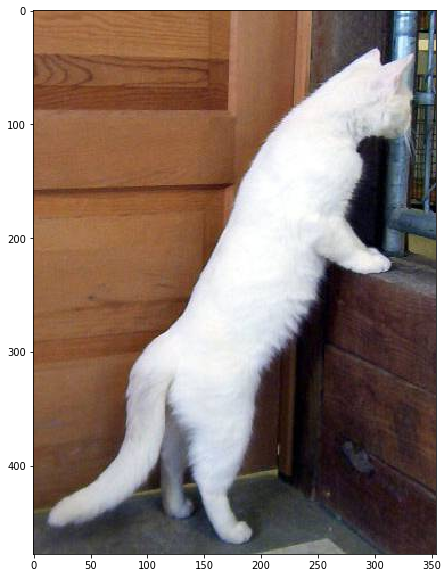

In [6]:
image = cv2.imread(image_paths[2500])

plt.figure(figsize=(10, 10))
rgb_image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(rgb_image);

In [7]:
data = []
labels = []

**Note:** Machine learning models take a *fixed size input*.

In [8]:
from keras.preprocessing.image import img_to_array

/Users/zkan/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.
/Users/zkan/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: compiletime version 3.5 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.6
  return f(*args, **kwds)


In [9]:
for image_path in image_paths:
    image = cv2.imread(image_path)
    label = image_path.split(os.path.sep)[-2]
    image = cv2.resize(image, (32, 32), interpolation=cv2.INTER_AREA)
    image = img_to_array(image, data_format='channels_first')
    data.append(image)
    labels.append(label)

In [10]:
data = np.array(data)
labels = np.array(labels)

Normalize images to the range [0, 1].

In [11]:
data = data.astype('float') / 255.0

In [12]:
from keras.models import Sequential
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.layers.core import Dense, Dropout, Flatten
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

In [13]:
lb = LabelBinarizer()

In [14]:
labels = lb.fit_transform(labels)

In [15]:
labels

array([[0, 0, 1],
       [1, 0, 0],
       [0, 0, 1],
       ...,
       [0, 1, 0],
       [0, 1, 0],
       [0, 0, 1]])

In [16]:
lb.classes_

array(['cats', 'dogs', 'panda'], dtype='<U5')

In [17]:
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.25, random_state=30)

In [18]:
X_test.shape

(750, 3, 32, 32)

## Building a Convolutional NN Model

In [19]:
# Keras uses "channels first".
input_shape = (3, 32, 32)

model = Sequential()
model.add(Conv2D(32, (3, 3), padding='same', input_shape=input_shape, activation='relu'))
model.add(Flatten())
model.add(Dense(3, activation='softmax'))

In [20]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 3, 32, 32)         9248      
_________________________________________________________________
flatten_1 (Flatten)          (None, 3072)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 3)                 9219      
Total params: 18,467
Trainable params: 18,467
Non-trainable params: 0
_________________________________________________________________


In [21]:
model.compile(
    loss='categorical_crossentropy', 
    optimizer='adam', 
    metrics=['accuracy']
)

In [22]:
H = model.fit(
    X_train, 
    y_train, 
    epochs=20,
    validation_split=0.2,
    batch_size=128
)

Train on 1800 samples, validate on 450 samples
Epoch 1/20
1800/1800 [==============================] - 1s 565us/step - loss: 1.0158 - acc: 0.4472 - val_loss: 0.9680 - val_acc: 0.5222
Epoch 2/20
1800/1800 [==============================] - 0s 152us/step - loss: 0.8973 - acc: 0.5494 - val_loss: 0.9350 - val_acc: 0.5333
Epoch 3/20
1800/1800 [==============================] - 0s 130us/step - loss: 0.8562 - acc: 0.5750 - val_loss: 1.0093 - val_acc: 0.5022
Epoch 4/20
1800/1800 [==============================] - 0s 130us/step - loss: 0.8761 - acc: 0.5539 - val_loss: 0.9193 - val_acc: 0.5022
Epoch 5/20
1800/1800 [==============================] - 0s 126us/step - loss: 0.8077 - acc: 0.5961 - val_loss: 0.8791 - val_acc: 0.5933
Epoch 6/20
1800/1800 [==============================] - 0s 113us/step - loss: 0.7854 - acc: 0.6094 - val_loss: 0.8361 - val_acc: 0.5978
Epoch 7/20
1800/1800 [==============================] - 0s 103us/step - loss: 0.7550 - acc: 0.6367 - val_loss: 0.9187 - val_acc: 0.5156
E

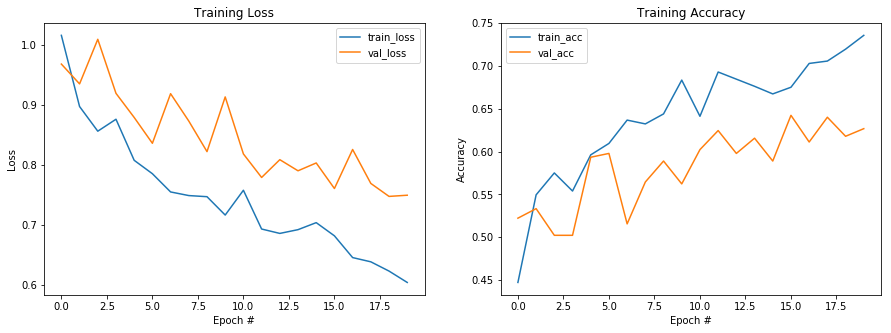

In [23]:
N = np.arange(0, 20)
plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
plt.plot(N, H.history['loss'], label='train_loss')
plt.plot(N, H.history['val_loss'], label='val_loss')
plt.title('Training Loss')
plt.xlabel('Epoch #')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(N, H.history['acc'], label="train_acc")
plt.plot(N, H.history['val_acc'], label='val_acc')
plt.title('Training Accuracy')
plt.xlabel('Epoch #')
plt.ylabel('Accuracy')
plt.legend();

In [24]:
y_pred = model.predict(X_test)

In [25]:
print(classification_report(
    y_test.argmax(axis=1), 
    y_pred.argmax(axis=1), 
    target_names=lb.classes_
))

             precision    recall  f1-score   support

       cats       0.56      0.52      0.54       242
       dogs       0.53      0.47      0.50       252
      panda       0.72      0.86      0.79       256

avg / total       0.61      0.62      0.61       750



## Building a (more-complex) Convolutional NN Model

(CONV => RELU) * 3 => POOL => FC

In [26]:
model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=input_shape, activation='relu', padding='same'))
model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(128, (3, 3), activation='relu', padding="same"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(3, activation='softmax'))

In [27]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 3, 32, 32)         9248      
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 3, 32, 128)        36992     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 3, 32, 128)        147584    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 1, 16, 128)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 1, 16, 128)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 2048)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 3)                 6147      
Total para

In [28]:
model.compile(
    loss='categorical_crossentropy', 
    optimizer='adam', 
    metrics=['accuracy']
)

In [29]:
model.fit(
    X_train, 
    y_train, 
    epochs=20,
    validation_split=0.2,
    batch_size=128
)

Train on 1800 samples, validate on 450 samples
Epoch 1/20
1800/1800 [==============================] - 4s 2ms/step - loss: 1.0111 - acc: 0.4672 - val_loss: 0.9114 - val_acc: 0.5311
Epoch 2/20
1800/1800 [==============================] - 3s 2ms/step - loss: 0.8864 - acc: 0.5633 - val_loss: 0.9297 - val_acc: 0.5578
Epoch 3/20
1800/1800 [==============================] - 3s 2ms/step - loss: 0.8740 - acc: 0.5589 - val_loss: 0.8750 - val_acc: 0.5667
Epoch 4/20
1800/1800 [==============================] - 3s 2ms/step - loss: 0.8143 - acc: 0.5956 - val_loss: 0.8359 - val_acc: 0.5822
Epoch 5/20
1800/1800 [==============================] - 3s 2ms/step - loss: 0.7988 - acc: 0.6067 - val_loss: 0.8913 - val_acc: 0.5489
Epoch 6/20
1800/1800 [==============================] - 3s 2ms/step - loss: 0.7863 - acc: 0.6111 - val_loss: 0.7990 - val_acc: 0.6000
Epoch 7/20
1800/1800 [==============================] - 3s 2ms/step - loss: 0.7245 - acc: 0.6567 - val_loss: 0.7637 - val_acc: 0.6133
Epoch 8/20
1800

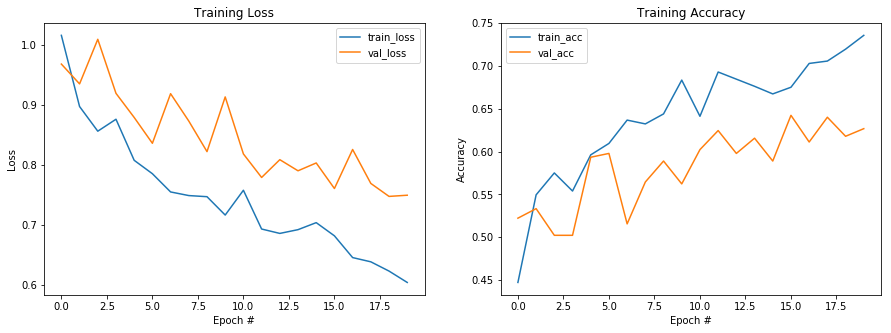

In [30]:
N = np.arange(0, 20)
plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
plt.plot(N, H.history['loss'], label='train_loss')
plt.plot(N, H.history['val_loss'], label='val_loss')
plt.title('Training Loss')
plt.xlabel('Epoch #')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(N, H.history['acc'], label="train_acc")
plt.plot(N, H.history['val_acc'], label='val_acc')
plt.title('Training Accuracy')
plt.xlabel('Epoch #')
plt.ylabel('Accuracy')
plt.legend();

In [31]:
y_pred = model.predict(X_test)

In [32]:
print(classification_report(
    y_test.argmax(axis=1), 
    y_pred.argmax(axis=1), 
    target_names=lb.classes_
))

             precision    recall  f1-score   support

       cats       0.59      0.59      0.59       242
       dogs       0.57      0.54      0.55       252
      panda       0.83      0.87      0.85       256

avg / total       0.66      0.67      0.67       750



## Model Persistence

In [33]:
import pickle

In [34]:
f = open('output/label-bins.pkl', 'wb')
pickle.dump(lb, f)
f.close()

In [35]:
model.save('output/cnn.h5')

In [36]:
from keras.models import load_model

In [37]:
model = load_model('output/cnn.h5')

In [38]:
y_pred = model.predict(X_test)
print(classification_report(
    y_test.argmax(axis=1), 
    y_pred.argmax(axis=1), 
    target_names=lb.classes_
))

             precision    recall  f1-score   support

       cats       0.59      0.59      0.59       242
       dogs       0.57      0.54      0.55       252
      panda       0.83      0.87      0.85       256

avg / total       0.66      0.67      0.67       750

